In [1]:
import pandas as pd
import matplotlib.pyplot as plt     
import ast
from datasets import load_dataset

In [3]:
dataset = load_dataset("lukebarousse/data_jobs")
df = pd.DataFrame(dataset['train'])

In [4]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [5]:
df['job_skillls'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

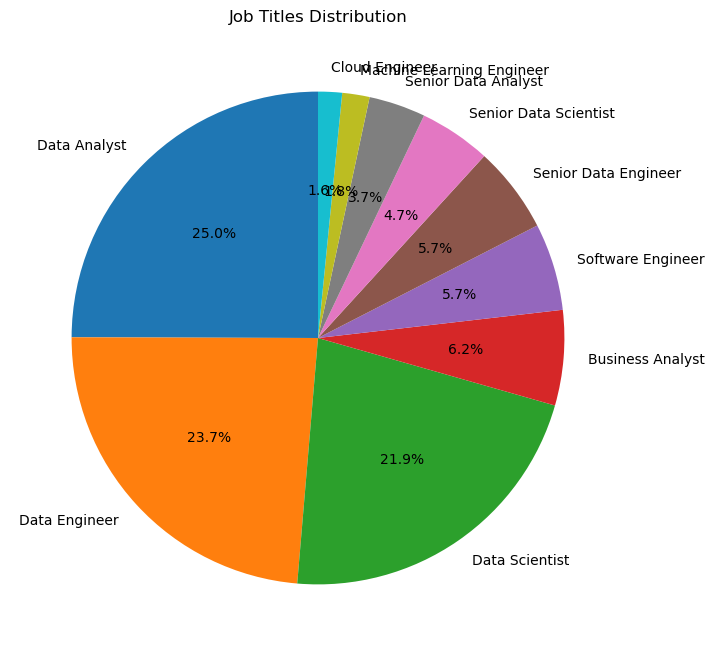

In [10]:
df['job_title_short'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', startangle=90, figsize=(8,8))
plt.title('Job Titles Distribution')
plt.ylabel('')
plt.show()

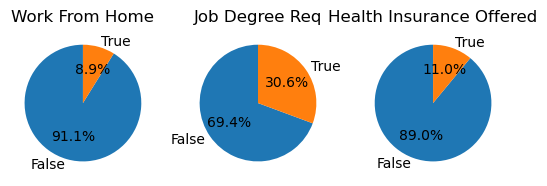

In [14]:
fig, ax = plt.subplots(1,3)

dict_columns = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (col_name, title) in enumerate(dict_columns.items()):
    df[col_name].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax[i])
    ax[i].set_title(title)
    ax[i].set_ylabel('')
    ax[i].legend().remove()
